In [1]:
import os
os.chdir('../')
from helpers import *

mousenums:  ['230', '355', '358', '362', '673', '674', '816', '825']


In [29]:
# using 40-60 split
rs = []
cta = []
for mouse in mousenums:
    track, neur, behav = getdicts(foldnames, mouse, 'epm')
    
    calc = getcalc(foldnames, mouse, 'epm')
    calc = zscore(calc)
    numCells = calc.shape[1]
    threat = epmthreat(track['mouse_positionMS'], behav)
    
    L1 = int(0.4*calc.shape[0])
    L2 = L1 + 75
    
    for key in ['o1Ind', 'o2Ind', 'c1Ind', 'c2Ind']:
        behav[key] = behav[key][behav[key] < L1]
    
    for c in range(numCells):
        ctype = celltypebehav(calc[0:L1, c], behav)
        cta.append(ctype)
        r = pearsonr(calc[L2:None, c], threat[L2:None])[0]
        rs.append(r)
        if len(rs) == 461:
            c_pos = calc[L2:None, c]
            t_pos = threat[L2:None]
        if len(rs) == 183:
            c_neg = calc[L2:None, c]
            t_neg = threat[L2:None]
        
rs = np.array(rs)
cta = np.array(cta)

In [30]:
colors = [[35, 147, 209], [191, 191, 191], [10, 138, 75]]
colors = np.array(colors)/255.0

(-0.3282378729870298, 1.4444299119278983e-134)
(0.7041636617723278, 0.0)


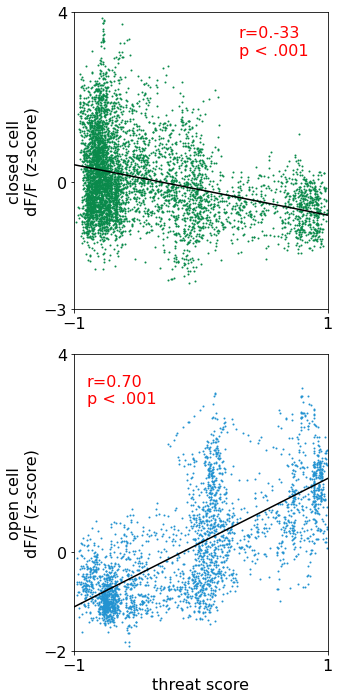

In [35]:
plt.figure(figsize=(5, 10))

plt.subplot(2, 1, 1)
plt.scatter(t_neg, c_neg, s=1, color=colors[2])
plt.xlim(-1, 1)
plt.xticks([-1, 1])
plt.ylim(-3, 4)
plt.yticks([-3, 0, 4])
plt.ylabel('closed cell\ndF/F (z-score)')
print(pearsonr(t_neg, c_neg))
plt.text(0.3, 3.0, 'r=0.-33\np < .001', c='r')

lr = LR()
lr.fit(t_neg.reshape((-1, 1)), c_neg)
plt.plot(plt.xlim(), lr.predict(np.array(plt.xlim()).reshape((-1, 1))), 'k')

plt.subplot(2, 1, 2)
plt.scatter(t_pos, c_pos, s=1, color=colors[0])
plt.xlim(-1, 1)
plt.xticks([-1, 1])
plt.ylim(-2, 4)
plt.yticks([-2, 0, 4])
plt.xlabel('threat score')
plt.ylabel('open cell\ndF/F (z-score)')
print(pearsonr(t_pos, c_pos))
plt.text(-0.9, 3.0, 'r=0.70\np < .001', c='r')

lr = LR()
lr.fit(t_pos.reshape((-1, 1)), c_pos)
plt.plot(plt.xlim(), lr.predict(np.array(plt.xlim()).reshape((-1, 1))), 'k')

plt.tight_layout()
plt.savefig('./elife_figs/2Gl.svg')

In [33]:
[np.sum(cta==typ) for typ in ['o', 'n', 'c']]

[180, 513, 164]

RanksumsResult(statistic=13.693364029768205, pvalue=1.1123759149757181e-42)


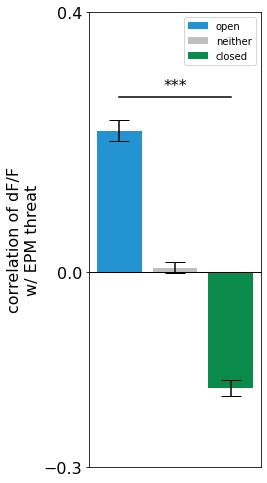

In [34]:
plt.figure(figsize=(4, 7))
for i, typ in enumerate(['o', 'n', 'c']):
    plt.bar(i, np.mean(rs[cta==typ]), color=colors[i])
plt.legend(['open', 'neither', 'closed'], prop={'size': 10})
for i, typ in enumerate(['o', 'n', 'c']):
    plt.errorbar(i, np.mean(rs[cta==typ]), sem(rs[cta==typ]), fmt='k_', ms=0, capsize=10)
plt.ylabel('correlation of dF/F\nw/ EPM threat')
plt.ylim(-0.3, 0.4)
plt.yticks([-0.3, 0, 0.4])
plt.xticks([])
plt.plot(0, 0, 'k_', ms=2000)
plt.plot([0, 2], [0.27, 0.27], 'k')
plt.text(1, 0.28, '***', ha='center')

print(ranksums(rs[cta=='o'], rs[cta=='c']))
plt.tight_layout()
plt.savefig('./elife_figs/2Gr.svg')